In [1]:
import pandas as pd
regions = {
        'ES-AN' : u'Andalucía',
        'ES-AR' : u'Aragón',
        'ES-AS' : u'Asturias',
        'ES-CN' : u'Canarias',
        'ES-CB' : u'Cantabria',
        'ES-CM' : u'Castilla La Mancha',
        'ES-CL' : u'Castilla y León',
        'ES-CT' : u'Catalunya',
        'ES-EX' : u'Extremadura',
        'ES-GA' : u'Galicia',
        'ES-IB' : u'Illes Balears',
        'ES-RI' : u'La Rioja',
        'ES-MD' : u'Comunidad de Madrid',
        'ES-MC' : u'Región de Murcia',
        'ES-NC' : u'Navarra',
        'ES-PV' : u'País Vasco',
        'ES-VC' : u'Comunidad Valenciana',
    'ES-CE': 'Ceuta',
    'ES-ML': 'Melilla'
    }
dataframe = pd.read_csv("https://www.mscbs.gob.es/profesionales/saludPublica/ccayes/alertasActual/nCov-China/documentos/Datos_Casos_COVID19.csv",
                       skiprows=6, skipfooter=0,engine="python", sep=';', encoding='iso8859',
                        parse_dates=['Fecha'], dayfirst=True)

In [2]:
dataframe

,CCAA_ISO,Fecha,Casos_Diagnosticados,Hospitalizados,UCI,Fallecidos
0,ES-AN,2020-01-01,0,1,0,0
1,ES-AR,2020-01-01,1,0,0,0
2,ES-CT,2020-01-01,0,1,0,0
3,ES-GA,2020-01-01,0,1,0,0
4,ES-MD,2020-01-01,0,1,0,0
...,...,...,...,...,...,...
5231,ES-ML,2020-12-01,22,0,0,1
5232,ES-NC,2020-12-01,65,6,0,0
5233,ES-PV,2020-12-01,337,0,0,0
5234,ES-RI,2020-12-01,84,7,0,1


In [3]:
data=dataframe.set_index(['CCAA_ISO','Fecha']).sort_index().unstack(level=0).fillna(0)

Andalucía


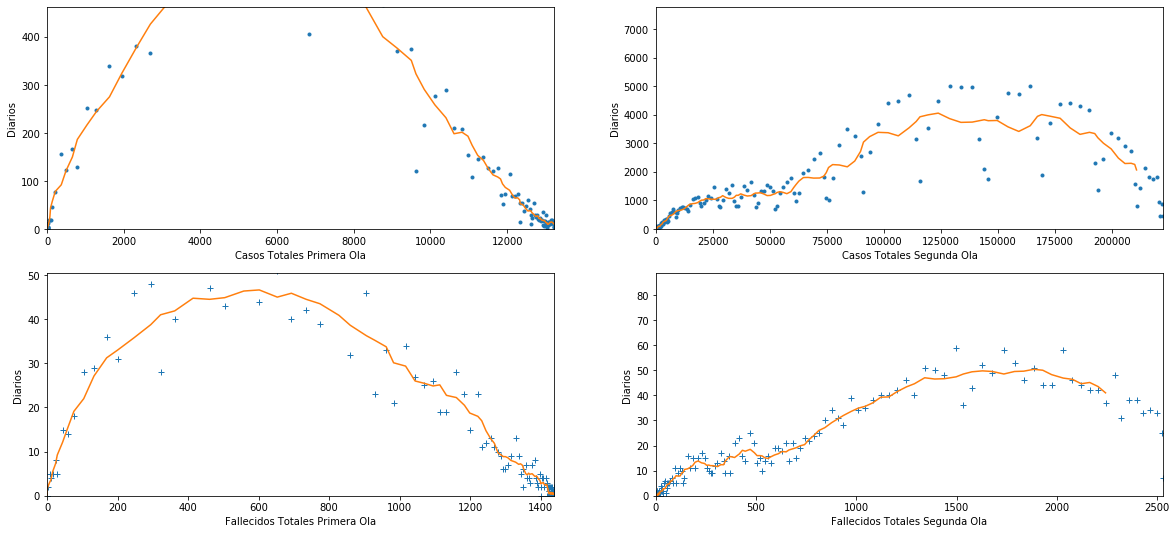

CFR Primera Ola: 11.0 Segunda Ola: 1.2
Aragón


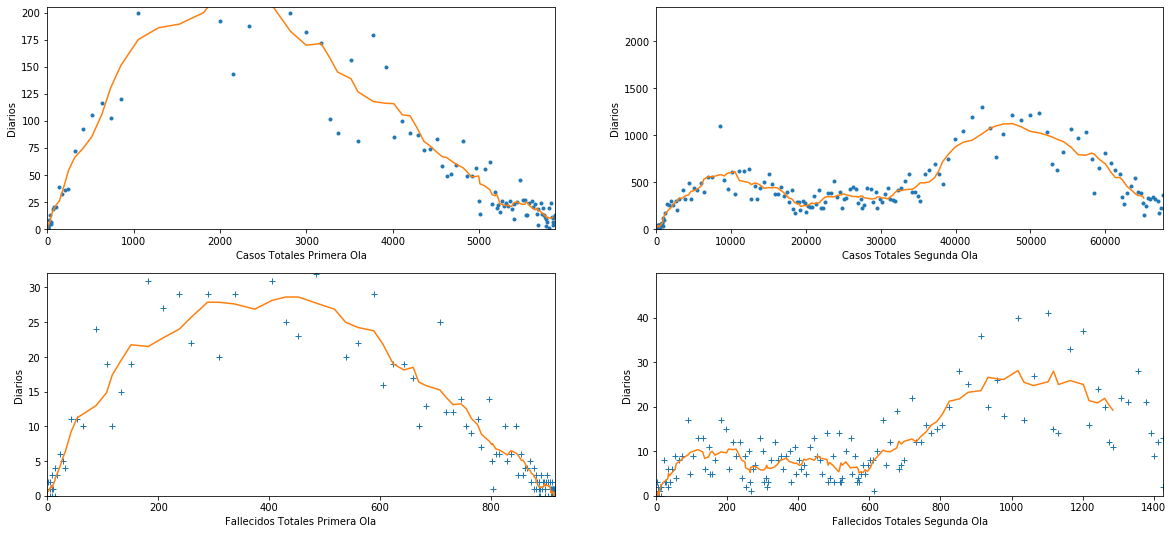

CFR Primera Ola: 15.8 Segunda Ola: 2.2
Asturias


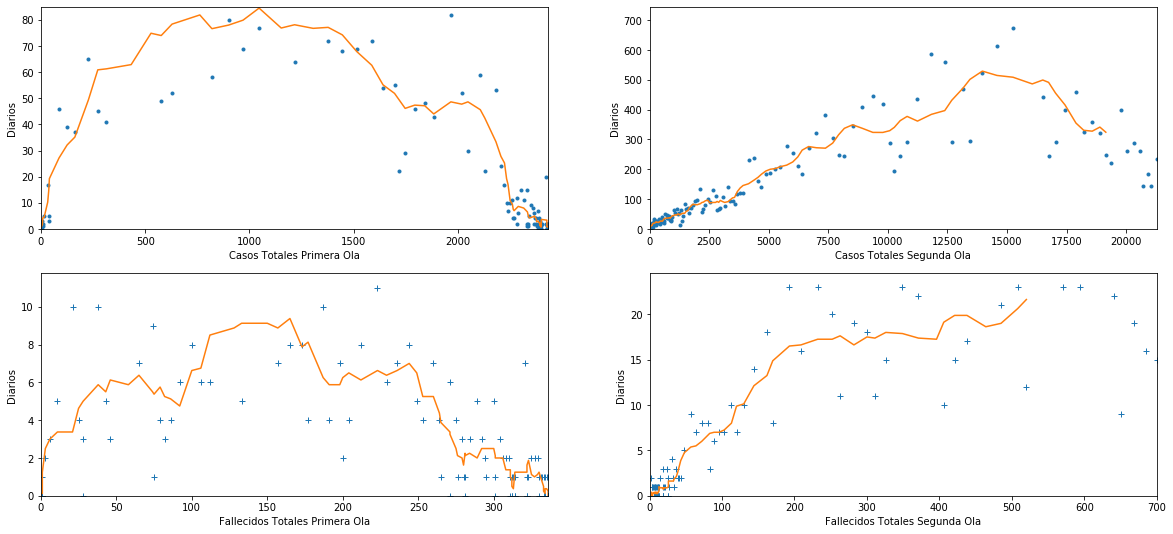

CFR Primera Ola: 13.9 Segunda Ola: 3.7
Cantabria


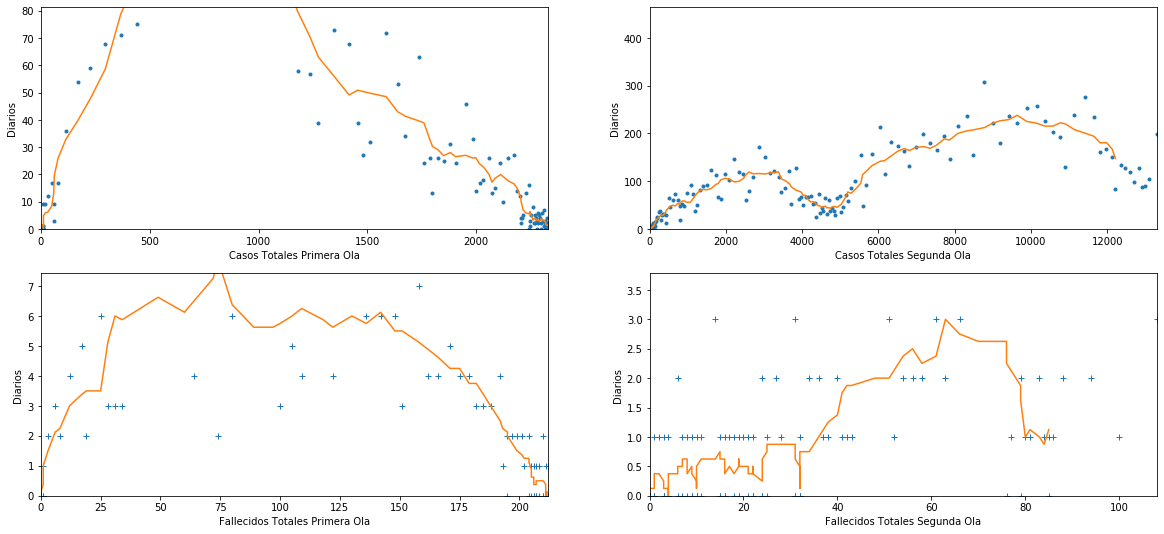

CFR Primera Ola: 9.1 Segunda Ola: 0.9
Ceuta


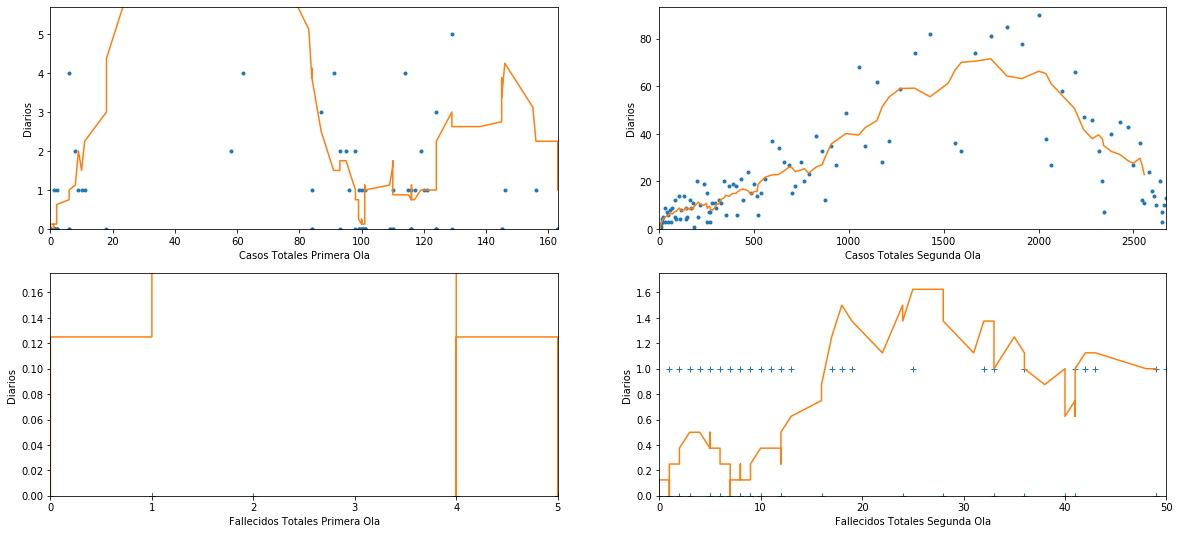

CFR Primera Ola: 3.4 Segunda Ola: 2.0
Castilla y León


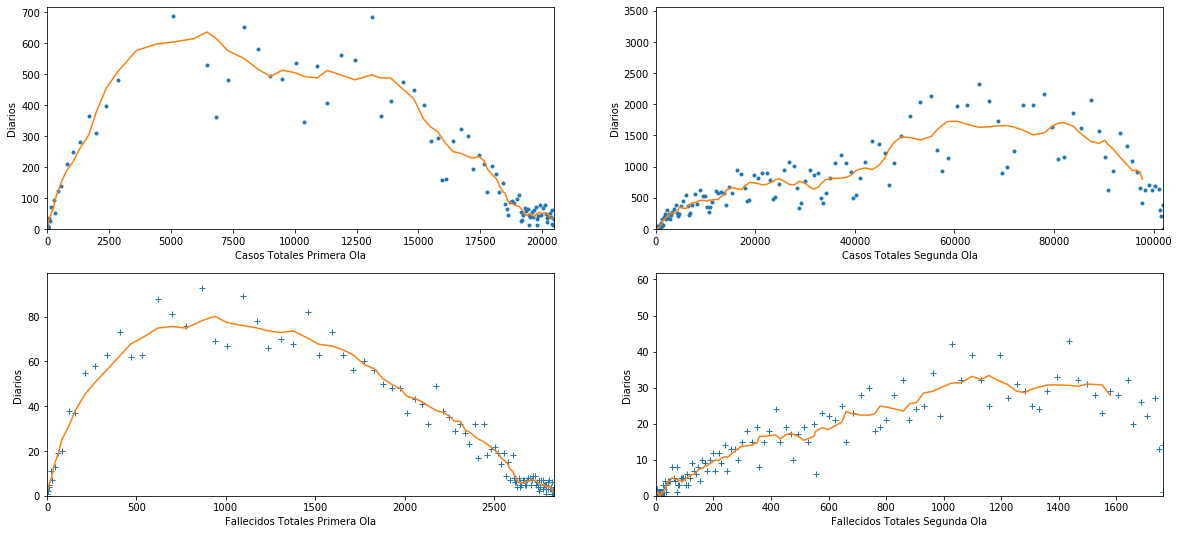

CFR Primera Ola: 14.1 Segunda Ola: 1.8
Castilla La Mancha


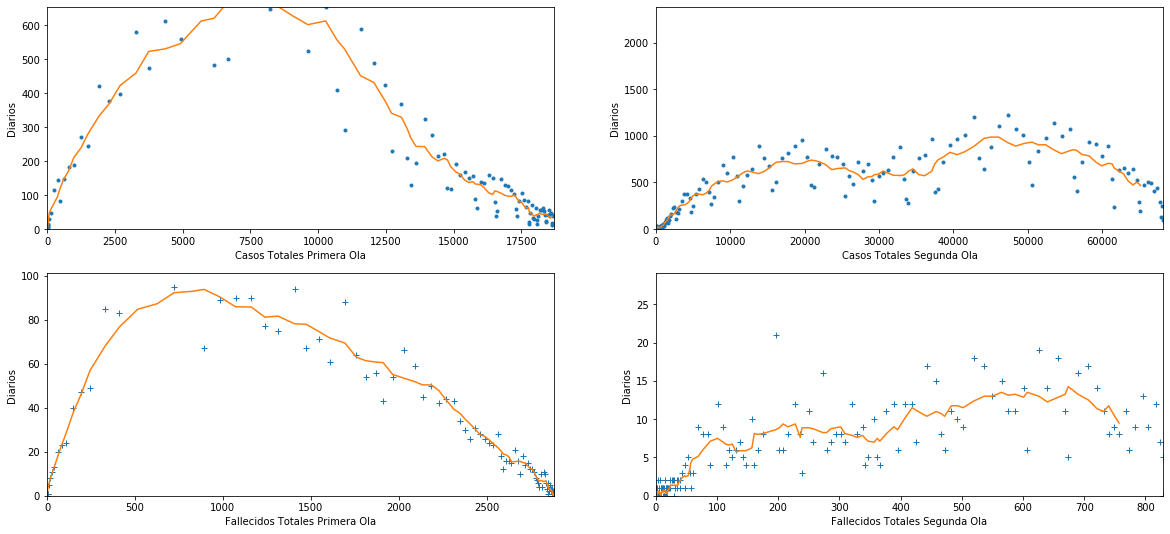

CFR Primera Ola: 15.7 Segunda Ola: 1.3
Canarias


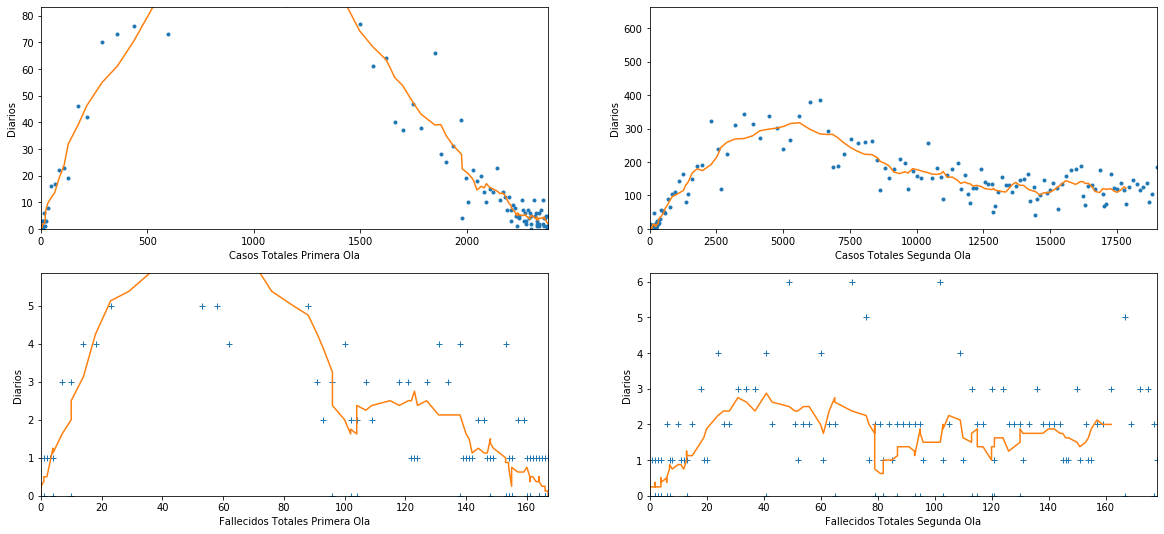

CFR Primera Ola: 7.1 Segunda Ola: 1.0
Catalunya


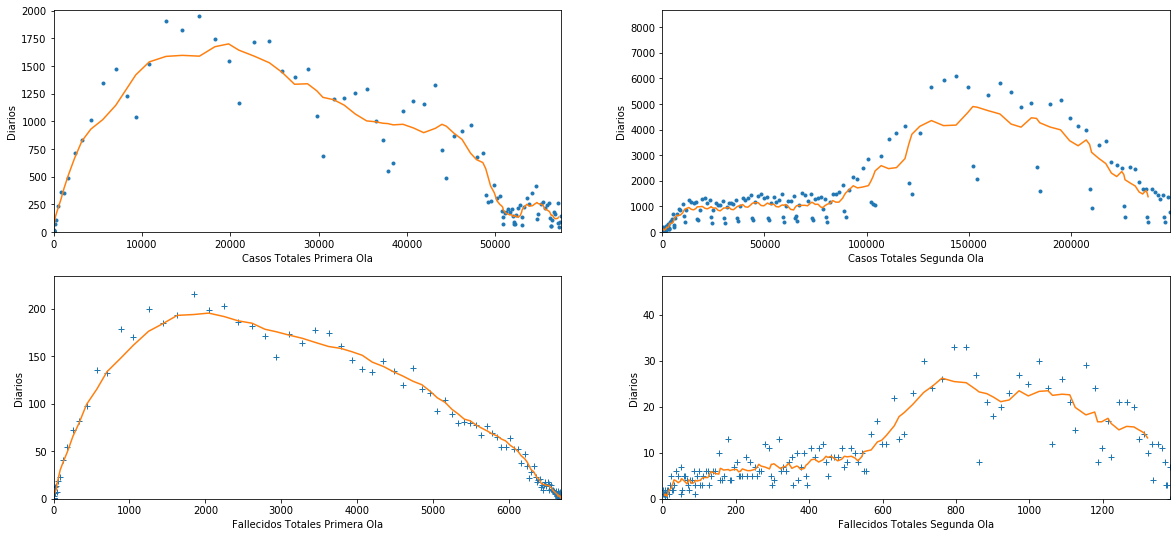

CFR Primera Ola: 11.9 Segunda Ola: 0.6
Extremadura


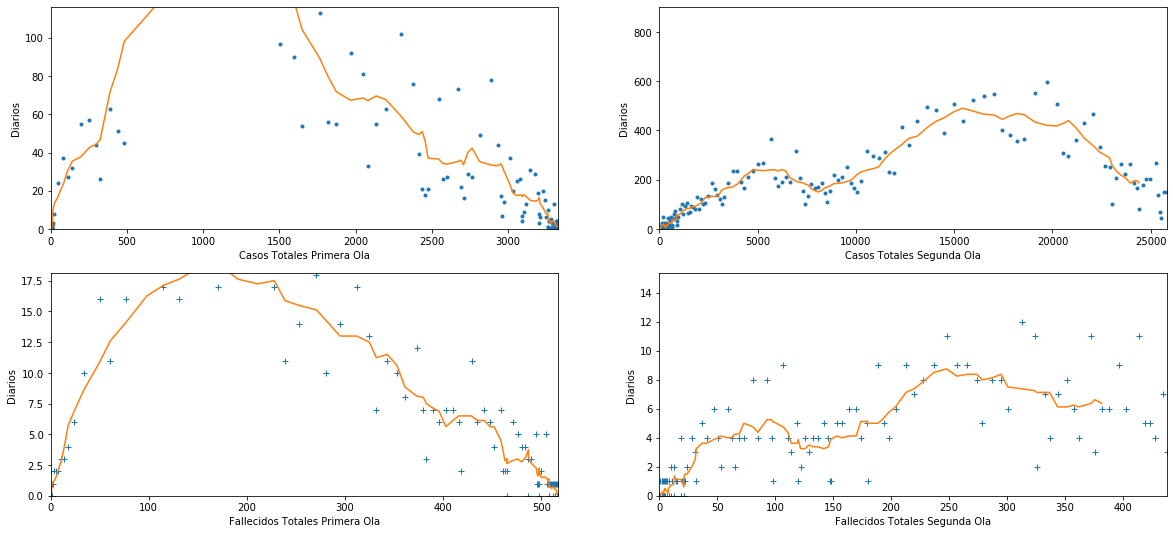

CFR Primera Ola: 15.6 Segunda Ola: 1.8
Galicia


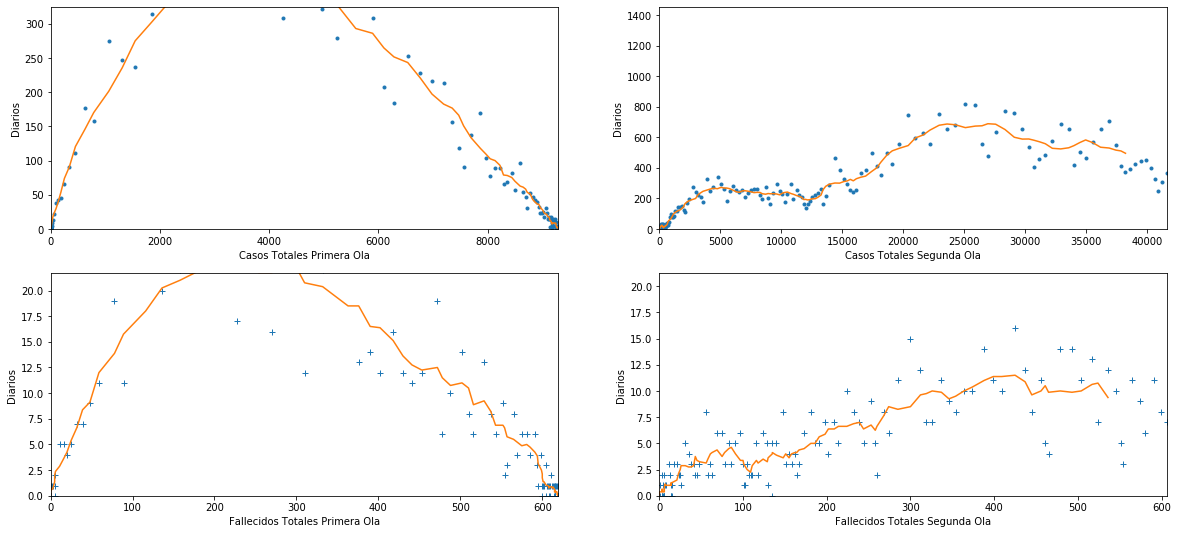

CFR Primera Ola: 6.7 Segunda Ola: 1.6
Illes Balears


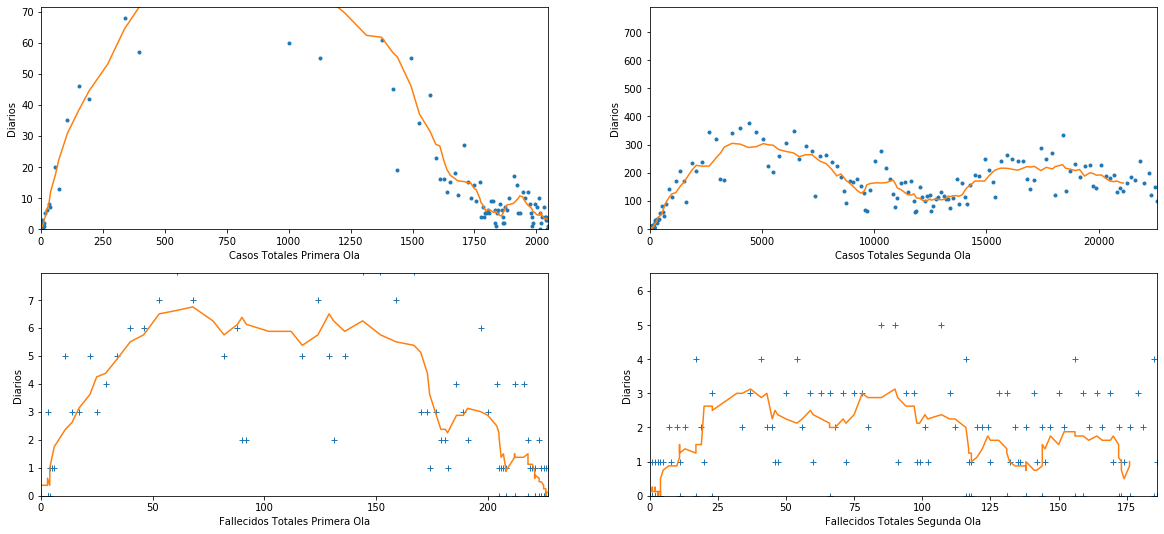

CFR Primera Ola: 11.3 Segunda Ola: 0.9
Región de Murcia


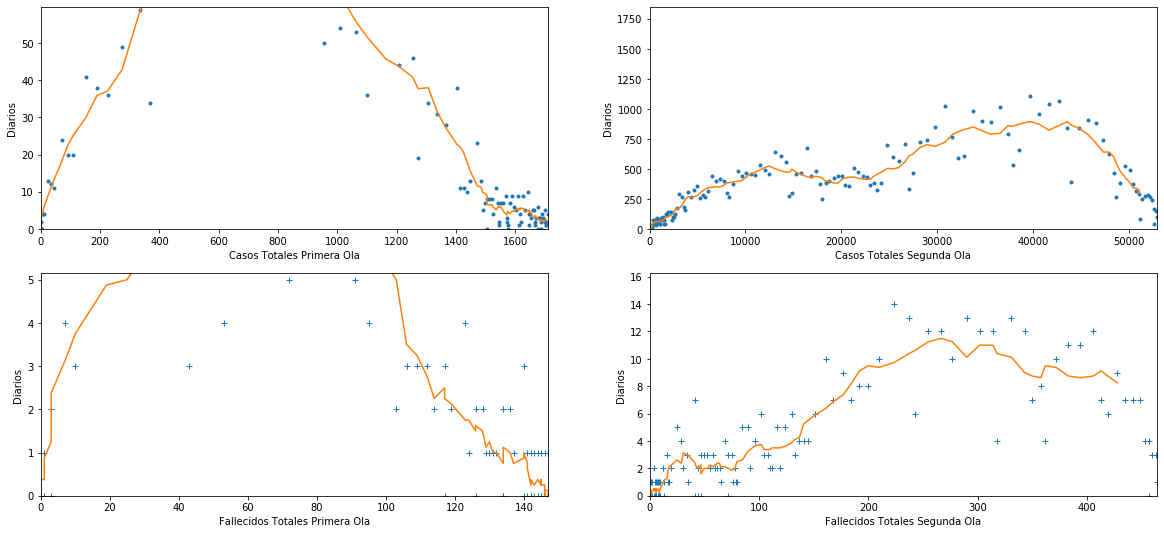

CFR Primera Ola: 8.7 Segunda Ola: 0.9
Comunidad de Madrid


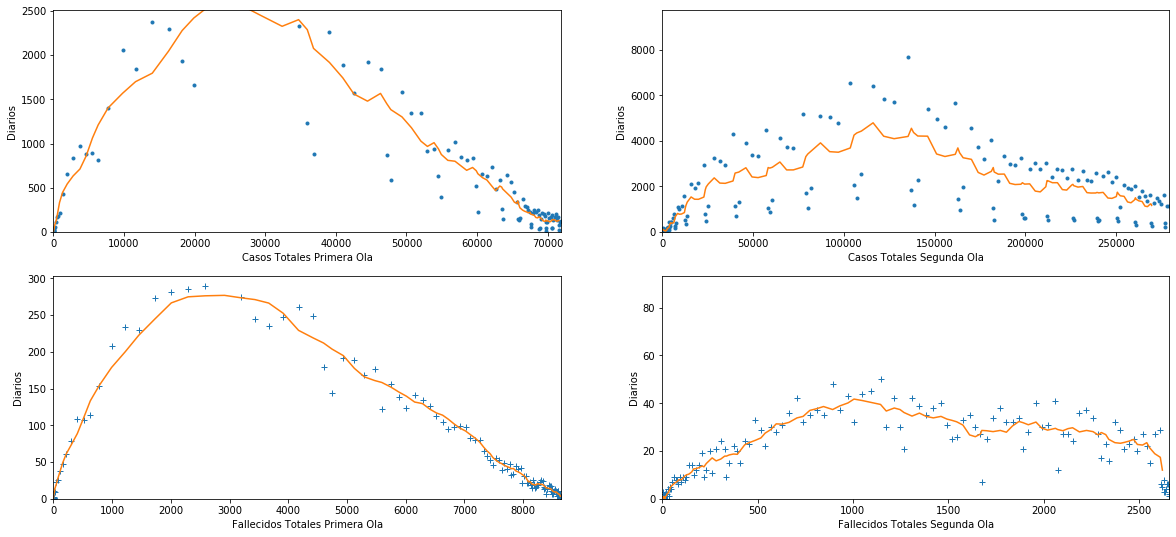

CFR Primera Ola: 12.2 Segunda Ola: 1.0
Melilla


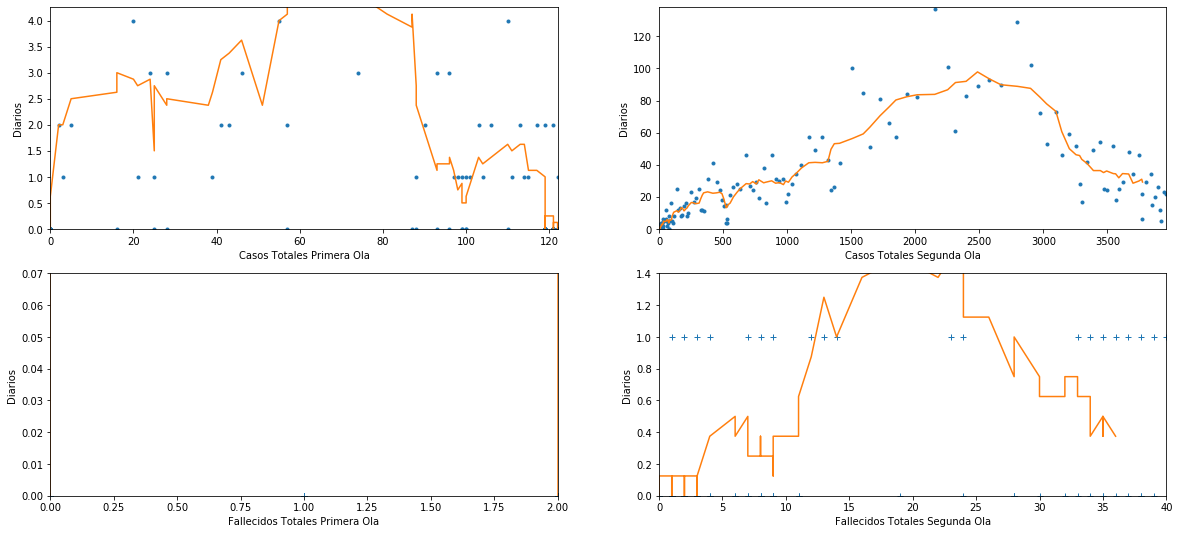

CFR Primera Ola: 1.7 Segunda Ola: 1.1
Navarra


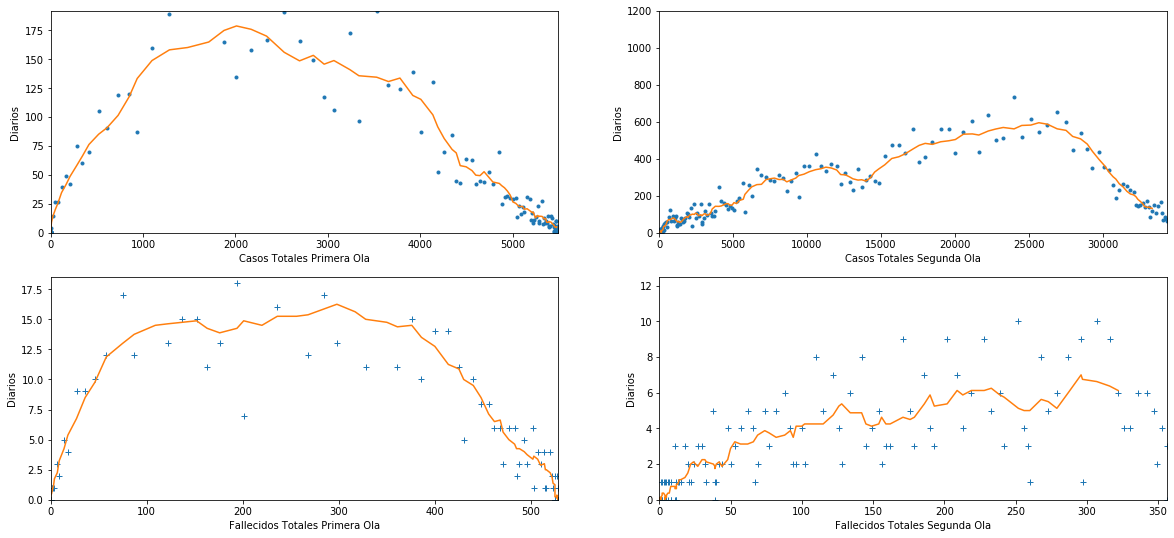

CFR Primera Ola: 9.7 Segunda Ola: 1.1
País Vasco


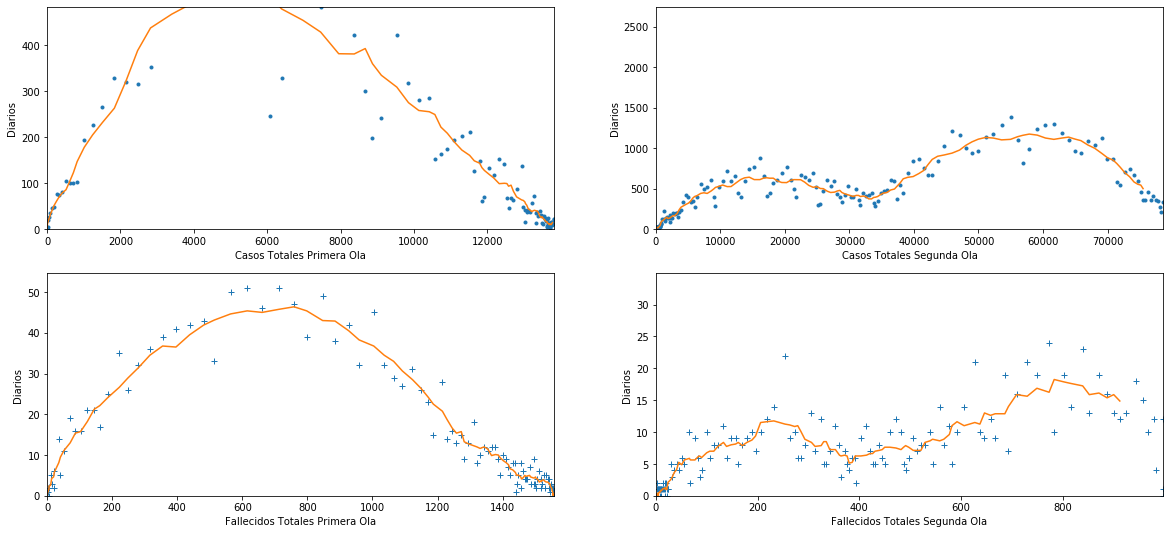

CFR Primera Ola: 11.4 Segunda Ola: 1.3
La Rioja


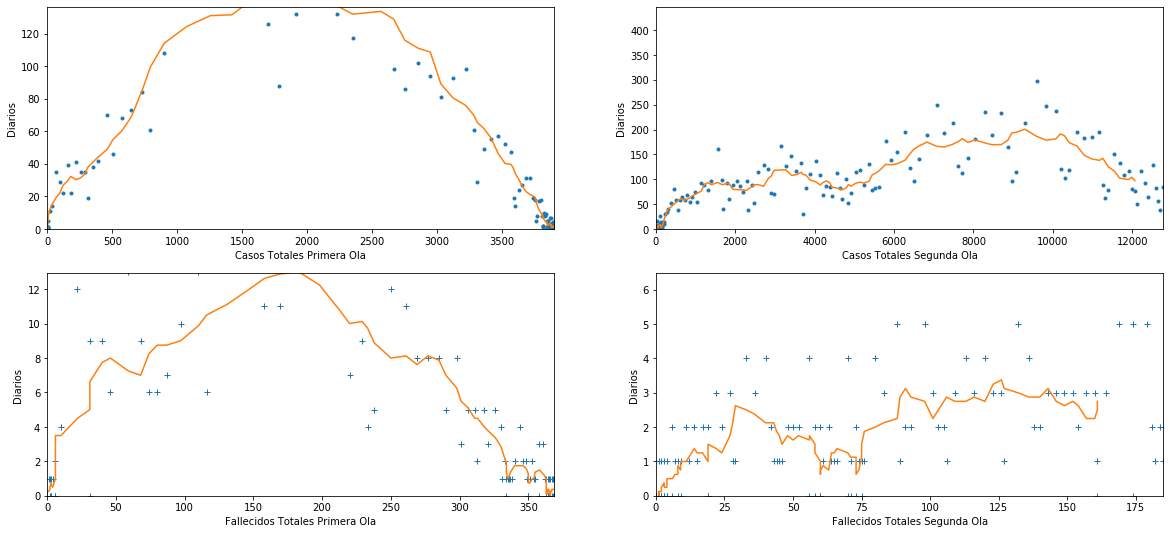

CFR Primera Ola: 9.5 Segunda Ola: 1.5
Comunidad Valenciana


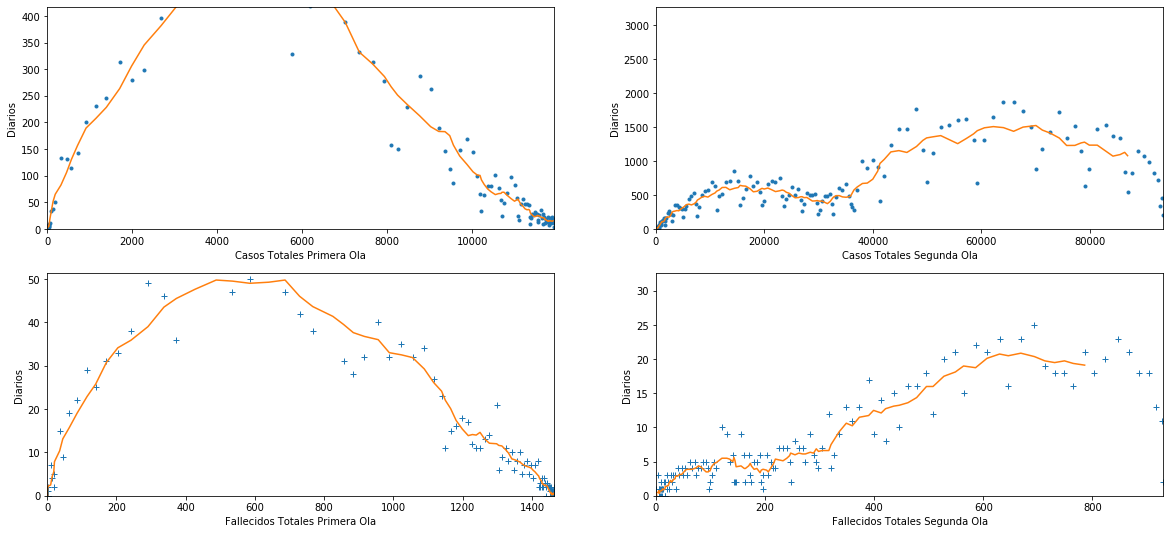

CFR Primera Ola: 12.4 Segunda Ola: 1.1


In [5]:
import matplotlib.pyplot as plt
import numpy as np
k=0.025
j=0.05
k=0.035
j=k
for x in data['Casos_Diagnosticados']:
    print(regions[x])
    n=160
    f=data['Casos_Diagnosticados'][x]
    ctotal2=sum(f[n:-10])
    ctotal1=sum(f[:n-10])
    plt.figure(figsize=(20, 9))
    plt.tight_layout()
    plt.subplot(2,2,2)
    plt.xlabel('Casos Totales Segunda Ola')
    plt.ylabel('Diarios')
    plt.xlim(0, sum(f[n:]))
    plt.ylim(0, sum(f[n:])*k)
    plt.plot(f[n:].cumsum(),f[n:],'.')
    plt.plot(f[n:-6].cumsum(),f[n:-6].rolling(8, center=True).mean()) 
    plt.subplot(2,2,1)
    plt.xlabel('Casos Totales Primera Ola')
    plt.ylabel('Diarios')
    plt.xlim(0, sum(f[:n]))
    plt.ylim(0, sum(f[:n])*j)
    plt.plot(f[:n].cumsum(),f[:n],'.')
    plt.plot(f[:n].cumsum(),f[:n].rolling(8,center=True).mean()) 
    f=data['Fallecidos'][x]
    n=180
    ftotal2=sum(f[n:])
    ftotal1=sum(f[:n])
    plt.subplot(2,2,4)
    plt.xlabel('Fallecidos Totales Segunda Ola')
    plt.ylabel('Diarios')
    plt.xlim(0, sum(f[n:]))
    plt.ylim(0, sum(f[n:])*k)
    plt.plot(f[n:].cumsum(),f[n:],'+')
    plt.plot(f[n:-6].cumsum(),f[n:-6].rolling(8, center=True).mean()) 
    plt.subplot(2,2,3)
    plt.xlabel('Fallecidos Totales Primera Ola')
    plt.ylabel('Diarios')
    plt.xlim(0, sum(f[:n]))
    plt.ylim(0, sum(f[:n])*j)
    plt.plot(f[:n].cumsum(),f[:n],'+')
    plt.plot(f[:n].cumsum(),f[:n].rolling(8,center=True).mean()) 
    plt.show()
    print("CFR Primera Ola:", round(ftotal1*100.0/ctotal1,1), "Segunda Ola:",round(ftotal2*100.0/ctotal2,1) )
    print("="*90)